# Bike Sharing Assignment

This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes.

# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.

How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

# Business Goal

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

# Attribute Information

day.csv have the following fields:

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

# Importing the Libraries

In [1]:
#import the warnings.
import warnings
#Suppress the warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup

from mpl_toolkits.mplot3d import Axes3D
import os # accessing directory structure
import plotly
import plotly.express as px
import matplotlib.style as style
import itertools

from datetime import date

# setting up plot style 
style.use('seaborn-poster')
style.use('fivethirtyeight')

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

# Sklearn models
from sklearn.linear_model import Lasso, ElasticNet, Ridge, SGDRegressor
from sklearn.svm import SVR, NuSVR
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

# Sklearn model delection
from sklearn.model_selection import RandomizedSearchCV
# Sklearn metrics
from sklearn.metrics import mean_squared_error, mean_squared_log_error

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Reading and Understanding the dataset

## Importing the input files 

In [3]:
# Reading from read only file "application_data.csv"
DF = pd.read_csv("day.csv")

# Print the input dataset
DF


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [4]:
# Print the first five lines from the input dataset
DF.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# checking the shape of input dataset DF
DF.shape

(730, 16)

In [6]:
#checking the size of input dataset DF
DF.size

11680

In [7]:
# checking the dtype of input dataset DF
DF.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
# checking info of dataset DF
DF.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
#describe the dataset DF
DF.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
# checking the null values in dataset DF
DF.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
# checking the value counts of season column of dataset DF
DF.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [12]:
# checking the value counts of weathersit column of dataset DF
DF.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [13]:
# checking the correleration of dataset DF
DF.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,4.135867e-01,8.660262e-01,4.982507e-01,0.016275,-0.001182,-0.015171,-0.021862,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
season,0.413587,1.000000e+00,-2.248195e-17,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584
yr,0.866026,-2.248195e-17,1.000000e+00,-2.470170e-17,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
mnth,0.498251,8.310321e-01,-2.470170e-17,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,0.016275,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-0.001182,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,-0.350848,0.199326,0.036183
workingday,-0.015171,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.090369,0.005466,-0.027640
weathersit,-0.021862,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,0.150738,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685


In [14]:
# Converting date to Pandas datetime format
DF['dteday'] = pd.to_datetime(DF['dteday'])

In [15]:
DF['dteday'] = DF['dteday'].dt.strftime('%Y/%d/%m')

In [16]:
DF.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018/01/01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018/01/02,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018/01/03,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018/01/04,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018/01/05,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [17]:
DF["dteday"] = pd.to_datetime(DF["dteday"],dayfirst=True)
DF.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Identified Column's Pre-Processing for Creating Dummy Variable 

In [18]:
# Replacing the data in the season column of the DF dataframe
DF["season"].replace({1: "spring", 2: 'summer',3:'fall',4:'winter'}, inplace=True)

# Replacing the data in the weathersit column of the DF dataframe
DF["weathersit"].replace({1: "Clear, Few clouds, Partly cloudy, Partly cloudy", 
                          2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                          3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
                          4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'}, inplace=True)

#Replacing the data in the mnth column of the DF dataframe
DF['mnth'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',
                    11:'Nov',12:'Dec'},inplace=True)

#Replacing the data in the weekday column of the DF dataframe
DF['weekday'].replace({5:'Sun',6:'Mon',0:'Tue',1:'Wed',2:'Thu',3:'Fri',4:'Sat'},inplace=True)

# Printing the first five columns of dataframe after replacing the data in the columns
DF.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Wed,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,0,Jan,0,Thu,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,spring,0,Jan,0,Fri,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,spring,0,Jan,0,Sat,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,spring,0,Jan,0,Sun,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Visualising the Data to Find the Correlation between the Numerical Variable

<Figure size 1440x1080 with 0 Axes>

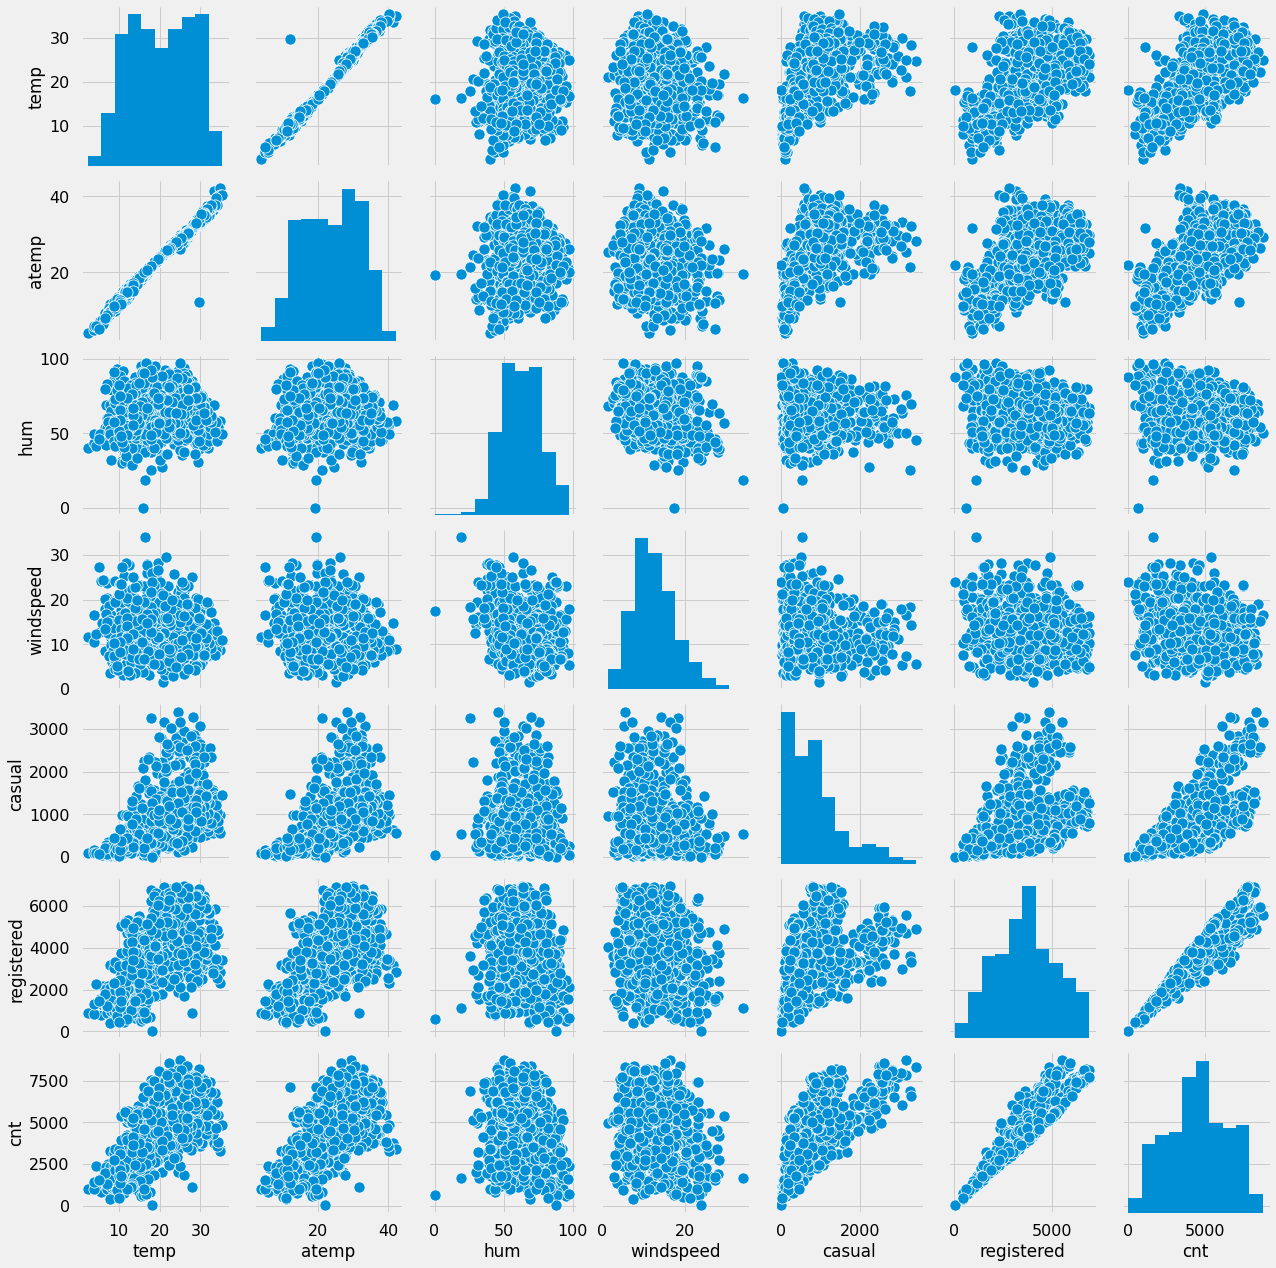

In [19]:
# Setting the figure Size
plt.figure(figsize=(20,15))

#plotting the pairplot using seaborn
sns.pairplot(DF, x_vars = ['temp','atemp','hum','windspeed','casual','registered', 'cnt'], 
                      y_vars = ['temp','atemp','hum','windspeed','casual','registered', 'cnt'])
#showing the plot
plt.show()

From pair plots, we can conclude that, Registered and Casual were highly correlated with cnt, that shows that both casual and registered are similar to cnt, hence they needs to be ignored in analysis as they directly relates to cnt.

# Visualising the Data to Find the Correlation between the Categorical Variables

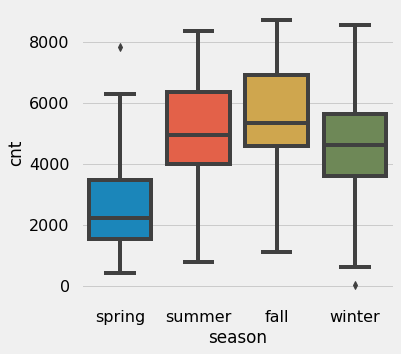

In [20]:
# Plotting the season vs cnt

# Setting the figure Size
plt.figure(figsize=(5, 5))

# Plotting the Box plot using Seaborn
sns.boxplot(x = 'season', y = 'cnt', data = DF)

# Showing the plot
plt.show()

Bike sharing count is more in season of summer and fall compared to winter and spring.

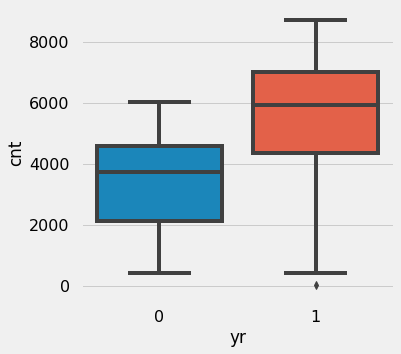

In [21]:
# Plotting the yr vs cnt

# Setting the figure Size
plt.figure(figsize=(5, 5))

# Plotting the box plot using Seaborn
sns.boxplot(x = 'yr', y = 'cnt', data = DF)

# Showing the plot
plt.show()


Bike sharing count is more in year 2019 

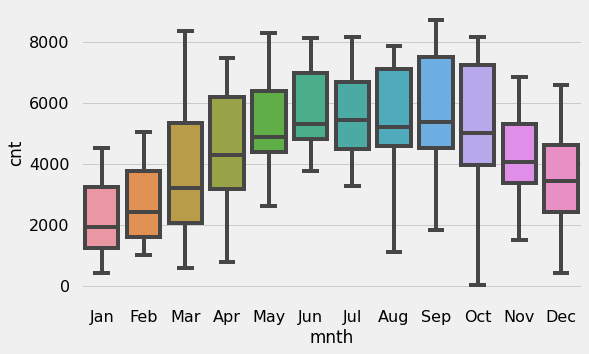

In [22]:
# Plotting the mnth vs cnt

# Setting the figure Size
plt.figure(figsize=(8, 5))

# Plotting the box plot using Seaborn
sns.boxplot(x = 'mnth', y = 'cnt', data = DF)

# Showing the plot
plt.show()

Bike sharing count is more in month of June to October than other months.

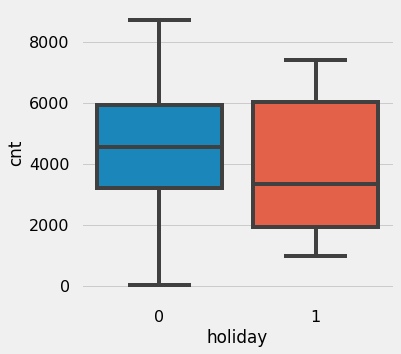

In [23]:
# Plotting the holiday vs cnt

# Setting the figure Size
plt.figure(figsize=(5, 5))

# Plotting the box plot using Seaborn
sns.boxplot(x = 'holiday', y = 'cnt', data = DF)

# Showing the plot
plt.show()

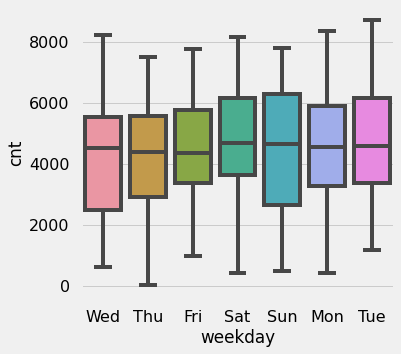

In [24]:
# Plotting weekday vs cnt

# Setting the figure Size
plt.figure(figsize=(5, 5))

# Plotting the box plot using Seaborn
sns.boxplot(x = 'weekday', y = 'cnt', data = DF)

# Showing the plot
plt.show()


Bike Sharing count have no major impact of weekday

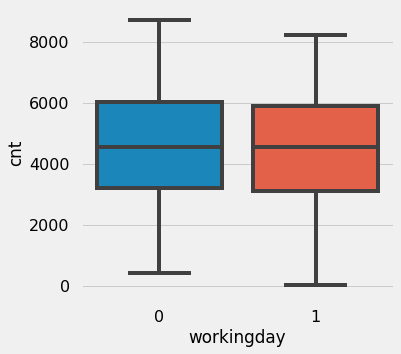

In [25]:
# Plotting the workingday vs cnt

# Setting the figure Size
plt.figure(figsize=(5, 5))

# Plotting the box plot using Seaborn
sns.boxplot(x = 'workingday', y = 'cnt', data = DF)

# Showing the plot
plt.show()

Bike Sharing count have no major impact of working day.

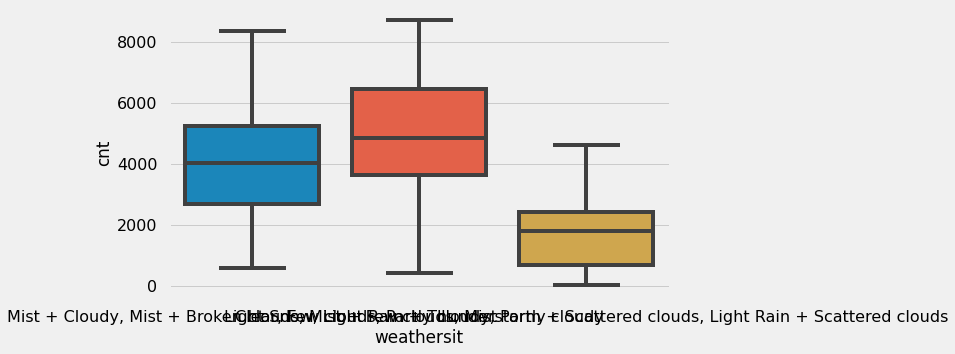

In [26]:
# Plotting the weathersit vs cnt

# Setting the figure Size
plt.figure(figsize=(8, 5))

# Plotting the box plot using Seaborn
sns.boxplot(x = 'weathersit', y = 'cnt', data = DF)

# Showing the plot
plt.show()

Bike sharing count is more when weathersit is Clear, Few clouds, partly cloudy, Partly cloudy.

# Creating Dummy Variable of Column 'season','weathersit','mnth','weekday'

In [27]:
status = pd.get_dummies(DF['season'],drop_first=True)

In [28]:
status1 = pd.get_dummies(DF['weathersit'],drop_first=True)

In [29]:
status2 = pd.get_dummies(DF['mnth'],drop_first=True)

In [30]:
status3 = pd.get_dummies(DF['weekday'],drop_first=True)

In [31]:
DF=pd.concat([DF,status1],axis=1)

In [32]:
DF=pd.concat([DF,status],axis=1)

In [33]:
DF=pd.concat([DF,status2],axis=1)

In [34]:
DF=pd.concat([DF,status3],axis=1)

In [35]:
DF.drop(['season','weathersit','dteday','instant','weekday','mnth','casual','registered'],axis=1,inplace=True)

In [36]:
# Printing the first five columns of dataframe DF
DF.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0


In [37]:
# Printing the columns of dataframe DF
DF.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue',
       'Wed'],
      dtype='object')

# Splitting the Data into Training and Testing Sets

In [38]:
# We specify this so that the train and test data set always have the same rows, respectively
#np.random.seed(0)
np.random.seed(0)
DF_train, DF_test = train_test_split(DF, train_size = 0.7, test_size = 0.3, random_state = 100)

In [39]:
#Rows and columns after split
print(DF_test.shape)
print(DF_train.shape)

(219, 30)
(510, 30)


In [40]:
DF_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,1,0,0,0,0,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,1,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,0,0,0,0,1,0


## Rescaling the Features

It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients.So Min-Max scaling is used to scale('temp', 'atemp', 'hum', 'windspeed', 'cnt') these columns.

In [41]:
#Normalisation = (x-xmin)/(x max-x min)
#Standardisation= (x-mu)/ sigma
#import the library
from sklearn.preprocessing import MinMaxScaler
#Instantiate an object
scaler = MinMaxScaler()

In [42]:
#Create a list of numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
#Fit on data
DF_train[num_vars] = scaler.fit_transform(DF_train[num_vars])

In [43]:
DF_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,1,0,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,1,0


In [44]:
DF_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.029412,0.343137,...,0.084314,0.086275,0.086275,0.080392,0.129412,0.143137,0.147059,0.152941,0.137255,0.154902
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.169124,0.475223,...,0.278131,0.281045,0.281045,0.272166,0.335985,0.350557,0.354512,0.360284,0.344454,0.362166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
# Checking correlation between DF_train 

DF_train.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
yr,1.000000,-0.014980,-0.003005,0.107288,0.104206,-0.084792,-0.001108,0.591508,-6.076399e-02,-0.015469,...,-0.025933,-0.018790,-0.018790,0.002574,-0.017733,0.032785,-3.419941e-02,0.026024,0.016537,-0.033817
holiday,-0.014980,1.000000,-0.254149,-0.066282,-0.070640,-0.029093,0.017569,-0.095961,-2.815377e-02,-0.038279,...,-0.049076,0.127543,-0.005387,0.043692,-0.025291,-0.066102,-3.202785e-02,0.034971,-0.028355,-0.069242
workingday,-0.003005,-0.254149,1.000000,-0.007643,0.003814,0.020701,-0.002504,-0.008723,8.289412e-03,-0.068924,...,0.021720,0.025939,0.025939,-0.034746,-0.605864,0.260091,2.520125e-01,0.234321,-0.626783,0.272446
temp,0.107288,-0.066282,-0.007643,1.000000,0.989537,0.155415,-0.187396,0.643517,-3.609266e-02,-0.090161,...,0.155415,-0.194765,-0.018709,0.207457,0.025276,0.074973,-1.953999e-02,-0.001951,0.006854,-0.037708
atemp,0.104206,-0.070640,0.003814,0.989537,1.000000,0.169461,-0.215283,0.646475,-4.426553e-02,-0.086069,...,0.161923,-0.185697,-0.005262,0.206157,0.012090,0.078627,-1.873114e-02,0.002815,0.006359,-0.036829
hum,-0.084792,-0.029093,0.020701,0.155415,0.169461,1.000000,-0.266895,-0.059993,2.450381e-01,0.481042,...,0.145604,0.004910,0.162014,0.152628,0.002783,-0.056997,5.190849e-02,0.033548,-0.027388,-0.030499
windspeed,-0.001108,0.017569,-0.002504,-0.187396,-0.215283,-0.266895,1.000000,-0.253794,8.689990e-02,-0.030385,...,-0.034137,0.009952,-0.018973,-0.121734,-0.016284,-0.021502,2.133435e-03,0.035616,0.018278,0.035390
cnt,0.591508,-0.095961,-0.008723,0.643517,0.646475,-0.059993,-0.253794,1.000000,-2.265984e-01,-0.175530,...,0.113027,-0.048130,0.065692,0.201327,0.012496,0.110430,-4.056563e-02,-0.018885,0.031237,-0.071188
"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",-0.060764,-0.028154,0.008289,-0.036093,-0.044266,0.245038,0.086900,-0.226598,1.000000e+00,-0.125817,...,-0.052822,0.029177,0.153177,0.033894,0.036609,-0.071148,9.155696e-02,-0.041726,-0.035708,0.021698
"Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",-0.015469,-0.038279,-0.068924,-0.090161,-0.086069,0.481042,-0.030385,-0.175530,-1.258171e-01,1.000000,...,0.077963,-0.016152,0.013268,0.044527,0.028952,-0.059543,3.086861e-03,-0.008775,0.071777,-0.035476


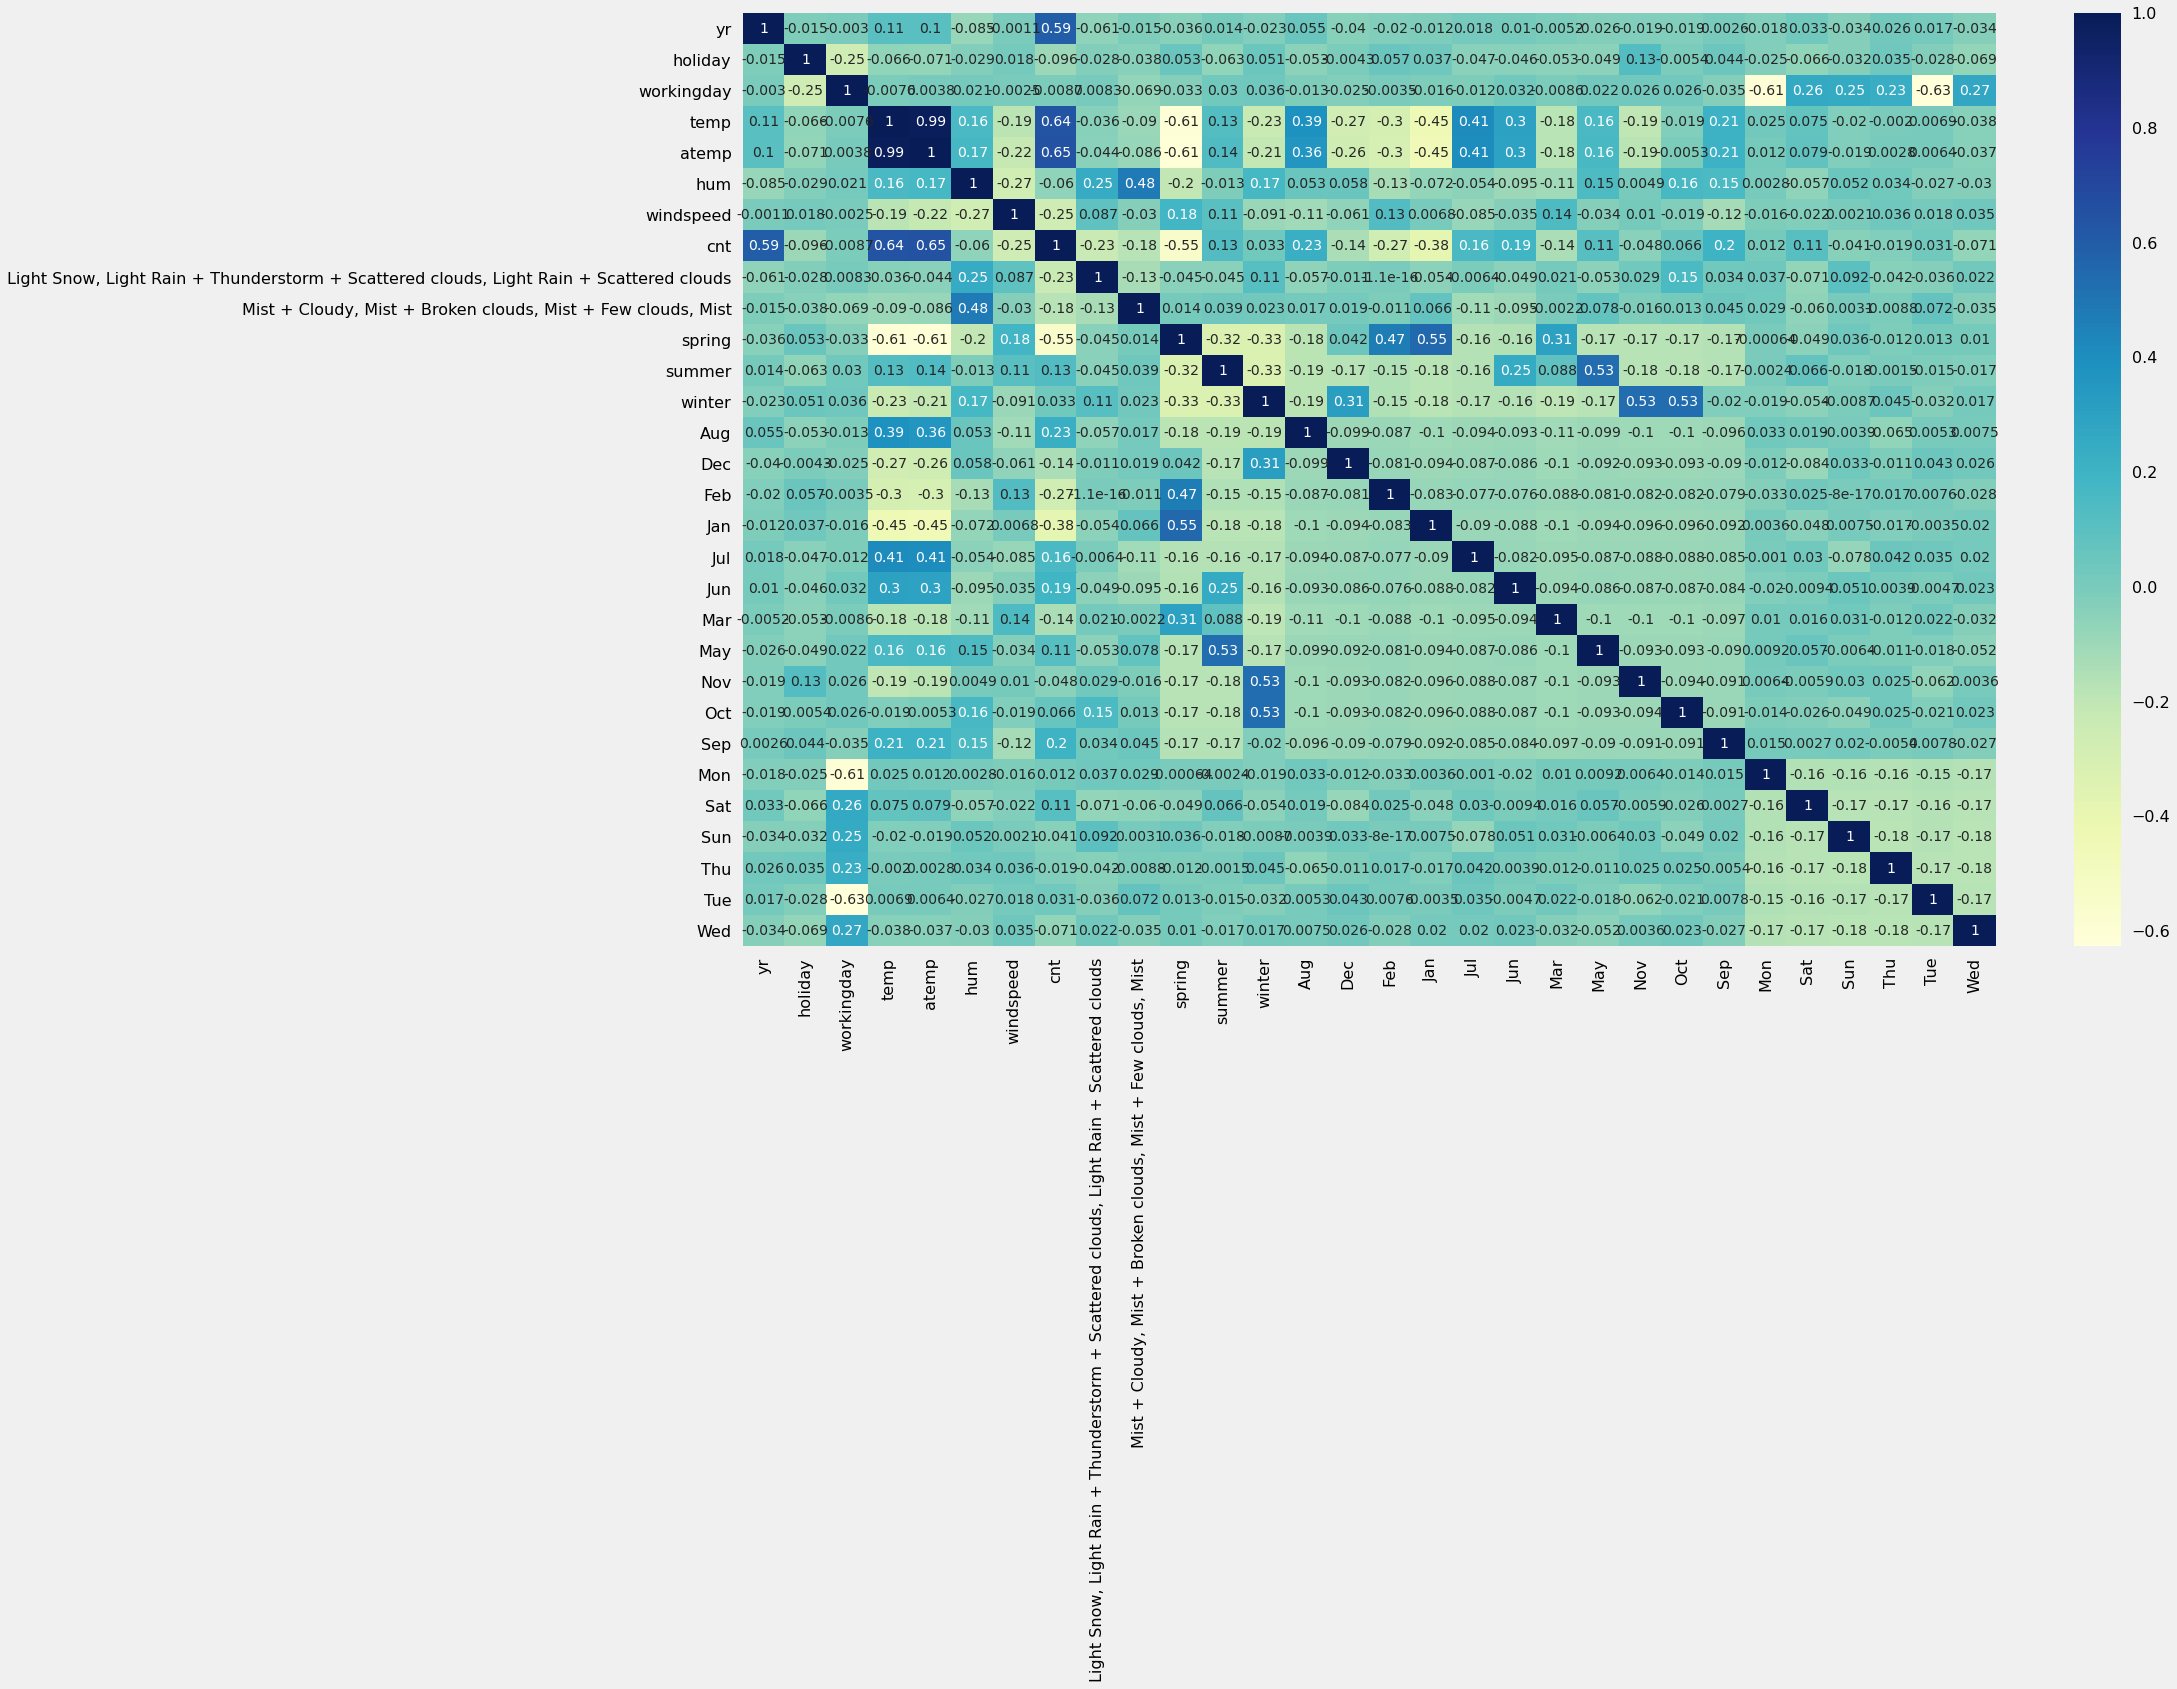

In [46]:
# Let's check the correlation coefficients to see which variables are highly correlated

# Setting the figure Size
plt.figure(figsize = (25, 16))

# Plotting the heat map using seaborn
sns.heatmap(DF_train.corr(), annot = True, cmap="YlGnBu")

# Showing the Plot
plt.show()

Inferences: 1.For variable 'atemp' & 'temp' have same correlation with 'cnt' as 0.65 and 0.64.

2.For variable 'yr' have correlation with target variable 'cnt' as 0.59.

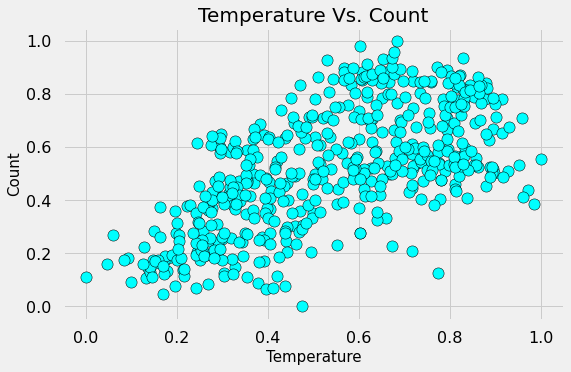

In [47]:
#From Heatmap we have seen the 'temp' variable is correlated to 'cnt' most. 
#plotting scatter plot for tenp vs cnt

plt.figure(figsize=[8, 5])
plt.scatter(DF_train['temp'], DF_train['cnt'], color = 'cyan', edgecolor = 'Black')
plt.title('Temperature Vs. Count', Fontsize = 20)
plt.xlabel('Temperature', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

#  Dividing into X and Y sets for the model building

In [48]:
y_train = DF_train.pop('cnt')
X_train = DF_train

In [49]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",spring,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,0,...,0,0,1,0,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,1,1,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0,0,1,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,0,0,1,0


# Building a linear model

To build the model need to fit a regression line through the training data using statsmodels. Added a constant in that statsmodels, to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [50]:
X_train_lm= sm.add_constant(X_train)
LinearRegression_model_1=sm.OLS(y_train,X_train_lm).fit()

In [51]:
# Checking the parameters obtained

LinearRegression_model_1.params

const                                                                                      0.383518
yr                                                                                         0.230933
holiday                                                                                   -0.135245
workingday                                                                                -0.060878
temp                                                                                       0.400268
atemp                                                                                      0.046419
hum                                                                                       -0.157757
windspeed                                                                                 -0.181137
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds   -0.250902
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                              -0.059311


In [52]:
# Print a summary of the linear regression model obtained
LinearRegression_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     94.48
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.09e-178
Time:                        17:45:57   Log-Likelihood:                 523.87
No. Observations:                 510   AIC:                            -987.7
Df Residuals:                     480   BIC:                            -860.7
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.3835      0.084      4.556      0.000       0.218       0.549
yr                                                                                          0.2309      0.008     28.359      0.000       0.215       0.247
holiday                                                                                    -0.1352      0.065     -2.068      0.039      -0.264      -0.007
workingday                                                                                 -0.0609      0.071     -0.856      0.392      -0.201       0.079
temp                                                                                        0.4003      0.143      2.790      0.005       0.118       0.682
atemp                                                                                       0.0464      0.139      0.333      0.739      -0.227       0.320
hum                                                                                        -0.1578      0.039     -4.054      0.000      -0.234      -0.081
windspeed                                                                                  -0.1811      0.027     -6.793      0.000      -0.234      -0.129
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2509      0.027     -9.402      0.000      -0.303      -0.198
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0593      0.011     -5.627      0.000      -0.080      -0.039
spring                                                                                     -0.0441      0.030     -1.455      0.146      -0.104       0.015
summer                                                                                      0.0418      0.027      1.575      0.116      -0.010       0.094
winter                                                                                      0.1105      0.028      3.915      0.000       0.055       0.166
Aug                                                                                         0.0230      0.034      0.671      0.503      -0.044       0.091
Dec                                                                                        -0.0457      0.034     -1.347      0.178      -0.112       0.021
Feb                                                                                        -0.0372      0.033     -1.117      0.265      -0.103       0.028
Jan                                                                                        -0.0635      0.034     -1.87

## Dropping variables on the basis of

1.Significance of variables (p-value)

2.VIF

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. 

Checking VIF parameter to test our linear model. The formula for calculating `VIF` is:

$ VIF_i = \frac{1}{1 - {R_i}^2} $

In [53]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,442.96
4,atemp,382.51
2,workingday,64.61
5,hum,41.21
9,spring,13.55
11,winter,12.51
27,Tue,12.34
23,Mon,11.83
10,summer,9.82
20,Nov,7.18


#### Dropping the insignificant variable 'atemp' as its p-value is .739 & VIF is also very high

In [55]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('atemp', 1)

In [56]:
# creating another model afetr dropping 'atemp' variable
X_train_lm_1 = sm.add_constant(X)
LinearRegression_model_2= sm.OLS(y_train, X_train_lm_1).fit()

In [57]:
# Print a summary of the linear regression model obtained
LinearRegression_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.33e-179
Time:                        17:45:58   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.3833      0.084      4.558      0.000       0.218       0.549
yr                                                                                          0.2309      0.008     28.387      0.000       0.215       0.247
holiday                                                                                    -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday                                                                                 -0.0605      0.071     -0.852      0.395      -0.200       0.079
temp                                                                                        0.4455      0.047      9.513      0.000       0.353       0.537
hum                                                                                        -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed                                                                                  -0.1830      0.026     -7.036      0.000      -0.234      -0.132
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2515      0.027     -9.455      0.000      -0.304      -0.199
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0594      0.011     -5.637      0.000      -0.080      -0.039
spring                                                                                     -0.0437      0.030     -1.444      0.149      -0.103       0.016
summer                                                                                      0.0422      0.026      1.598      0.111      -0.010       0.094
winter                                                                                      0.1109      0.028      3.938      0.000       0.056       0.166
Aug                                                                                         0.0215      0.034      0.632      0.527      -0.045       0.088
Dec                                                                                        -0.0457      0.034     -1.348      0.178      -0.112       0.021
Feb                                                                                        -0.0373      0.033     -1.121      0.263      -0.103       0.028
Jan                                                                                        -0.0636      0.034     -1.880      0.061      -0.130       0.003
Jul                                                                                        -0.0349      0.035     -0.98

### Calculate the VIFs again for the new model

In [58]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,64.59
3,temp,44.11
4,hum,41.16
8,spring,13.53
10,winter,12.49
26,Tue,12.33
22,Mon,11.83
9,summer,9.79
19,Nov,7.18
20,Oct,6.95


#### Dropping the insignificant variable 'Aug' as its p-value is .527 & VIF is also very high

In [59]:
# dropping variable
X1 = X.drop('Aug', 1)

In [60]:
#building a new model
X_train_lm_2 = sm.add_constant(X1)
LinearRegression_model_3= sm.OLS(y_train, X_train_lm_2).fit()

In [61]:
# Print a summary of the linear regression model obtained
LinearRegression_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.17e-180
Time:                        17:45:59   Log-Likelihood:                 523.60
No. Observations:                 510   AIC:                            -991.2
Df Residuals:                     482   BIC:                            -872.6
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.3940      0.082      4.785      0.000       0.232       0.556
yr                                                                                          0.2306      0.008     28.405      0.000       0.215       0.247
holiday                                                                                    -0.1350      0.065     -2.068      0.039      -0.263      -0.007
workingday                                                                                 -0.0595      0.071     -0.838      0.402      -0.199       0.080
temp                                                                                        0.4538      0.045     10.108      0.000       0.366       0.542
hum                                                                                        -0.1567      0.039     -4.037      0.000      -0.233      -0.080
windspeed                                                                                  -0.1841      0.026     -7.094      0.000      -0.235      -0.133
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2518      0.027     -9.475      0.000      -0.304      -0.200
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0591      0.011     -5.622      0.000      -0.080      -0.038
spring                                                                                     -0.0523      0.027     -1.941      0.053      -0.105       0.001
summer                                                                                      0.0303      0.018      1.639      0.102      -0.006       0.067
winter                                                                                      0.1059      0.027      3.919      0.000       0.053       0.159
Dec                                                                                        -0.0541      0.031     -1.741      0.082      -0.115       0.007
Feb                                                                                        -0.0425      0.032     -1.321      0.187      -0.106       0.021
Jan                                                                                        -0.0684      0.033     -2.077      0.038      -0.133      -0.004
Jul                                                                                        -0.0538      0.019     -2.813      0.005      -0.091      -0.016
Jun                                                                                        -0.0096      0.019     -0.50

### Checking VIF

In [62]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,55.60
4,hum,40.96
3,temp,38.46
10,winter,11.63
8,spring,11.08
25,Tue,10.66
21,Mon,10.20
18,Nov,5.98
13,Jan,5.88
5,windspeed,5.59


#### Dropping the insignificant variable 'Oct' as its p-value is .0.865 and VIF is also High

In [63]:
#dropping variable
X2 = X1.drop('Oct', 1)

In [64]:
# creating another new model
X_train_lm_3 = sm.add_constant(X2)
LinearRegression_model_4= sm.OLS(y_train, X_train_lm_3).fit()

In [65]:
# Print a summary of the linear regression model obtained
LinearRegression_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     105.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.05e-181
Time:                        17:45:59   Log-Likelihood:                 523.58
No. Observations:                 510   AIC:                            -993.2
Df Residuals:                     483   BIC:                            -878.8
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.3924      0.082      4.801      0.000       0.232       0.553
yr                                                                                          0.2307      0.008     28.445      0.000       0.215       0.247
holiday                                                                                    -0.1351      0.065     -2.070      0.039      -0.263      -0.007
workingday                                                                                 -0.0590      0.071     -0.833      0.405      -0.198       0.080
temp                                                                                        0.4554      0.044     10.368      0.000       0.369       0.542
hum                                                                                        -0.1575      0.038     -4.095      0.000      -0.233      -0.082
windspeed                                                                                  -0.1843      0.026     -7.116      0.000      -0.235      -0.133
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2520      0.027     -9.497      0.000      -0.304      -0.200
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0590      0.010     -5.627      0.000      -0.080      -0.038
spring                                                                                     -0.0536      0.026     -2.073      0.039      -0.104      -0.003
summer                                                                                      0.0307      0.018      1.674      0.095      -0.005       0.067
winter                                                                                      0.1025      0.018      5.682      0.000       0.067       0.138
Dec                                                                                        -0.0502      0.020     -2.451      0.015      -0.090      -0.010
Feb                                                                                        -0.0400      0.029     -1.402      0.162      -0.096       0.016
Jan                                                                                        -0.0658      0.029     -2.263      0.024      -0.123      -0.009
Jul                                                                                        -0.0534      0.019     -2.814      0.005      -0.091      -0.016
Jun                                                                                        -0.0094      0.019     -0.49

In [66]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,54.70
4,hum,39.99
3,temp,37.27
24,Tue,10.48
8,spring,10.06
20,Mon,10.03
5,windspeed,5.57
10,winter,4.96
9,summer,4.93
13,Jan,4.64


#### Dropping the insignificant variable 'Mar' as its p-value is .892¶ 

In [67]:
# dropping variable
X3 = X2.drop('Mar', 1)

In [68]:
# creating another new model
X_train_lm_4 = sm.add_constant(X3)

LinearRegression_model_5= sm.OLS(y_train, X_train_lm_4).fit()

In [69]:
# Print a summary of the linear regression model obtained
LinearRegression_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     110.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.79e-182
Time:                        17:46:00   Log-Likelihood:                 523.57
No. Observations:                 510   AIC:                            -995.1
Df Residuals:                     484   BIC:                            -885.0
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.3915      0.081      4.812      0.000       0.232       0.551
yr                                                                                          0.2306      0.008     28.478      0.000       0.215       0.247
holiday                                                                                    -0.1350      0.065     -2.072      0.039      -0.263      -0.007
workingday                                                                                 -0.0592      0.071     -0.836      0.403      -0.198       0.080
temp                                                                                        0.4567      0.043     10.682      0.000       0.373       0.541
hum                                                                                        -0.1576      0.038     -4.103      0.000      -0.233      -0.082
windspeed                                                                                  -0.1841      0.026     -7.126      0.000      -0.235      -0.133
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2520      0.027     -9.506      0.000      -0.304      -0.200
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0590      0.010     -5.632      0.000      -0.080      -0.038
spring                                                                                     -0.0554      0.022     -2.485      0.013      -0.099      -0.012
summer                                                                                      0.0303      0.018      1.673      0.095      -0.005       0.066
winter                                                                                      0.1026      0.018      5.693      0.000       0.067       0.138
Dec                                                                                        -0.0490      0.019     -2.648      0.008      -0.085      -0.013
Feb                                                                                        -0.0375      0.022     -1.723      0.086      -0.080       0.005
Jan                                                                                        -0.0632      0.022     -2.903      0.004      -0.106      -0.020
Jul                                                                                        -0.0534      0.019     -2.817      0.005      -0.091      -0.016
Jun                                                                                        -0.0091      0.019     -0.48

### Checking VIF

In [70]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,52.81
4,hum,39.91
3,temp,35.65
23,Tue,10.08
19,Mon,9.70
8,spring,7.18
5,windspeed,5.56
10,winter,4.96
9,summer,4.80
13,Jan,2.62


#### Dropping the insignificant variable 'Jun' as its p-value is High  .629

In [71]:
#dropping the variable 'Jun'
X4 = X3.drop('Jun', 1)

In [72]:
#creating a new model
X_train_lm_5 = sm.add_constant(X4)
LinearRegression_model_6= sm.OLS(y_train, X_train_lm_5).fit()

In [73]:
# Print a summary of the linear regression model obtained
LinearRegression_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     115.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.96e-183
Time:                        17:46:02   Log-Likelihood:                 523.45
No. Observations:                 510   AIC:                            -996.9
Df Residuals:                     485   BIC:                            -891.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.3952      0.081      4.883      0.000       0.236       0.554
yr                                                                                          0.2310      0.008     28.664      0.000       0.215       0.247
holiday                                                                                    -0.1350      0.065     -2.074      0.039      -0.263      -0.007
workingday                                                                                 -0.0598      0.071     -0.846      0.398      -0.199       0.079
temp                                                                                        0.4479      0.039     11.587      0.000       0.372       0.524
hum                                                                                        -0.1551      0.038     -4.079      0.000      -0.230      -0.080
windspeed                                                                                  -0.1830      0.026     -7.116      0.000      -0.234      -0.132
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2524      0.026     -9.534      0.000      -0.304      -0.200
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0591      0.010     -5.645      0.000      -0.080      -0.039
spring                                                                                     -0.0567      0.022     -2.561      0.011      -0.100      -0.013
summer                                                                                      0.0275      0.017      1.604      0.109      -0.006       0.061
winter                                                                                      0.1019      0.018      5.678      0.000       0.067       0.137
Dec                                                                                        -0.0503      0.018     -2.749      0.006      -0.086      -0.014
Feb                                                                                        -0.0388      0.022     -1.795      0.073      -0.081       0.004
Jan                                                                                        -0.0651      0.021     -3.042      0.002      -0.107      -0.023
Jul                                                                                        -0.0509      0.018     -2.796      0.005      -0.087      -0.015
May                                                                                         0.0231      0.017      1.32

### Checking VIF

In [74]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X4.columns
vif['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,51.86
4,hum,38.84
3,temp,29.36
22,Tue,9.91
18,Mon,9.51
8,spring,7.12
5,windspeed,5.51
10,winter,4.94
9,summer,4.32
13,Jan,2.55


#### Dropping the insignificant variable 'Tue' as p-value is high 0.586 and VIF also High¶ 

In [75]:
#dropping the variable 
X5 = X4.drop('Tue', 1)

In [76]:
#creating a new model
X_train_lm_6 = sm.add_constant(X5)
LinearRegression_model_7= sm.OLS(y_train, X_train_lm_6).fit()

In [77]:
# Print a summary of the linear regression model obtained
LinearRegression_model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     120.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.18e-184
Time:                        17:46:04   Log-Likelihood:                 523.29
No. Observations:                 510   AIC:                            -998.6
Df Residuals:                     486   BIC:                            -897.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.3564      0.038      9.264      0.000       0.281       0.432
yr                                                                                          0.2313      0.008     28.773      0.000       0.215       0.247
holiday                                                                                    -0.1029      0.027     -3.755      0.000      -0.157      -0.049
workingday                                                                                 -0.0223      0.015     -1.440      0.150      -0.053       0.008
temp                                                                                        0.4483      0.039     11.608      0.000       0.372       0.524
hum                                                                                        -0.1543      0.038     -4.063      0.000      -0.229      -0.080
windspeed                                                                                  -0.1835      0.026     -7.143      0.000      -0.234      -0.133
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2523      0.026     -9.537      0.000      -0.304      -0.200
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0591      0.010     -5.648      0.000      -0.080      -0.039
spring                                                                                     -0.0563      0.022     -2.549      0.011      -0.100      -0.013
summer                                                                                      0.0276      0.017      1.617      0.107      -0.006       0.061
winter                                                                                      0.1020      0.018      5.684      0.000       0.067       0.137
Dec                                                                                        -0.0502      0.018     -2.744      0.006      -0.086      -0.014
Feb                                                                                        -0.0385      0.022     -1.784      0.075      -0.081       0.004
Jan                                                                                        -0.0649      0.021     -3.036      0.003      -0.107      -0.023
Jul                                                                                        -0.0510      0.018     -2.802      0.005      -0.087      -0.015
May                                                                                         0.0229      0.017      1.31

### Checking VIF

In [78]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X5.columns
vif['VIF'] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,32.90
3,temp,19.31
2,workingday,10.52
8,spring,5.60
5,windspeed,4.89
10,winter,4.16
9,summer,3.43
13,Jan,2.39
7,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",2.38
22,Wed,2.25


#### Dropping the insignificant variable 'Mon' as p-value is high i.e. 0.654¶

In [79]:
#dropping the variable
X6 = X5.drop('Mon', 1)

In [80]:
#creating a new model
X_train_lm_7 = sm.add_constant(X6)

LinearRegression_model_8= sm.OLS(y_train, X_train_lm_7).fit()

In [81]:
# Print a summary of the linear regression model obtained
LinearRegression_model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     126.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.04e-185
Time:                        17:46:06   Log-Likelihood:                 523.19
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     487   BIC:                            -903.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.3532      0.038      9.349      0.000       0.279       0.427
yr                                                                                          0.2314      0.008     28.822      0.000       0.216       0.247
holiday                                                                                    -0.1000      0.027     -3.758      0.000      -0.152      -0.048
workingday                                                                                 -0.0190      0.014     -1.397      0.163      -0.046       0.008
temp                                                                                        0.4479      0.039     11.610      0.000       0.372       0.524
hum                                                                                        -0.1543      0.038     -4.067      0.000      -0.229      -0.080
windspeed                                                                                  -0.1832      0.026     -7.141      0.000      -0.234      -0.133
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2528      0.026     -9.572      0.000      -0.305      -0.201
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0590      0.010     -5.643      0.000      -0.080      -0.038
spring                                                                                     -0.0566      0.022     -2.562      0.011      -0.100      -0.013
summer                                                                                      0.0276      0.017      1.614      0.107      -0.006       0.061
winter                                                                                      0.1019      0.018      5.687      0.000       0.067       0.137
Dec                                                                                        -0.0500      0.018     -2.739      0.006      -0.086      -0.014
Feb                                                                                        -0.0382      0.022     -1.775      0.077      -0.081       0.004
Jan                                                                                        -0.0649      0.021     -3.039      0.003      -0.107      -0.023
Jul                                                                                        -0.0507      0.018     -2.794      0.005      -0.086      -0.015
May                                                                                         0.0229      0.017      1.31

### Checking VIF

In [82]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X6.columns
vif['VIF'] = [variance_inflation_factor(X6.values, i) for i in range(X6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,32.58
3,temp,18.65
2,workingday,8.32
8,spring,5.48
5,windspeed,4.88
10,winter,4.12
9,summer,3.38
13,Jan,2.39
7,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",2.38
21,Wed,2.25


#### Dropping the insignificant variable 'Sun' as p-value is high i.e 0.464

In [83]:
#dropping the variable
X7 = X6.drop('Sun', 1)

In [84]:
#creating a new model
X_train_lm_8 = sm.add_constant(X7)

LinearRegression_model_9= sm.OLS(y_train, X_train_lm_8).fit()

In [85]:
# Print a summary of the linear regression model obtained
LinearRegression_model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     132.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.65e-186
Time:                        17:46:08   Log-Likelihood:                 522.91
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     488   BIC:                            -908.7
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.3518      0.038      9.328      0.000       0.278       0.426
yr                                                                                          0.2312      0.008     28.827      0.000       0.215       0.247
holiday                                                                                    -0.0980      0.026     -3.703      0.000      -0.150      -0.046
workingday                                                                                 -0.0130      0.011     -1.196      0.232      -0.034       0.008
temp                                                                                        0.4495      0.038     11.675      0.000       0.374       0.525
hum                                                                                        -0.1541      0.038     -4.064      0.000      -0.229      -0.080
windspeed                                                                                  -0.1826      0.026     -7.125      0.000      -0.233      -0.132
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2517      0.026     -9.550      0.000      -0.303      -0.200
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0589      0.010     -5.641      0.000      -0.079      -0.038
spring                                                                                     -0.0558      0.022     -2.532      0.012      -0.099      -0.012
summer                                                                                      0.0278      0.017      1.630      0.104      -0.006       0.061
winter                                                                                      0.1014      0.018      5.666      0.000       0.066       0.137
Dec                                                                                        -0.0491      0.018     -2.697      0.007      -0.085      -0.013
Feb                                                                                        -0.0383      0.022     -1.780      0.076      -0.081       0.004
Jan                                                                                        -0.0650      0.021     -3.044      0.002      -0.107      -0.023
Jul                                                                                        -0.0512      0.018     -2.822      0.005      -0.087      -0.016
May                                                                                         0.0224      0.017      1.28

### Checking VIF

In [86]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X7.columns
vif['VIF'] = [variance_inflation_factor(X7.values, i) for i in range(X7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,32.57
3,temp,18.63
8,spring,5.48
2,workingday,5.34
5,windspeed,4.88
10,winter,4.10
9,summer,3.38
13,Jan,2.39
7,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",2.38
0,yr,2.11


#### Dropping the insignificant variable 'Sat' as p-value is high i.e 0.468

In [87]:
#dropping the variable
X8 = X7.drop('Sat', 1)

In [88]:
#creating a new model
X_train_lm_9 = sm.add_constant(X8)

LinearRegression_model_10= sm.OLS(y_train, X_train_lm_9).fit()

In [89]:
# Print a summary of the linear regression model obtained
LinearRegression_model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     138.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          6.15e-187
Time:                        17:46:10   Log-Likelihood:                 522.63
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     489   BIC:                            -914.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.3520      0.038      9.339      0.000       0.278       0.426
yr                                                                                          0.2313      0.008     28.864      0.000       0.216       0.247
holiday                                                                                    -0.0972      0.026     -3.679      0.000      -0.149      -0.045
workingday                                                                                 -0.0097      0.010     -0.985      0.325      -0.029       0.010
temp                                                                                        0.4497      0.038     11.688      0.000       0.374       0.525
hum                                                                                        -0.1547      0.038     -4.083      0.000      -0.229      -0.080
windspeed                                                                                  -0.1826      0.026     -7.126      0.000      -0.233      -0.132
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2532      0.026     -9.642      0.000      -0.305      -0.202
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0591      0.010     -5.668      0.000      -0.080      -0.039
spring                                                                                     -0.0559      0.022     -2.538      0.011      -0.099      -0.013
summer                                                                                      0.0282      0.017      1.651      0.099      -0.005       0.062
winter                                                                                      0.1015      0.018      5.672      0.000       0.066       0.137
Dec                                                                                        -0.0497      0.018     -2.731      0.007      -0.085      -0.014
Feb                                                                                        -0.0378      0.022     -1.759      0.079      -0.080       0.004
Jan                                                                                        -0.0652      0.021     -3.054      0.002      -0.107      -0.023
Jul                                                                                        -0.0506      0.018     -2.791      0.005      -0.086      -0.015
May                                                                                         0.0225      0.017      1.29

### Checking VIF 

In [90]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X8.columns
vif['VIF'] = [variance_inflation_factor(X8.values, i) for i in range(X8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,32.56
3,temp,18.63
8,spring,5.48
5,windspeed,4.88
2,workingday,4.41
10,winter,4.10
9,summer,3.37
13,Jan,2.39
7,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",2.37
0,yr,2.10


#### Dropping the insignificant variable 'workingday' as p-value is high 0.325¶

In [91]:
#dropping the variable
X9 = X8.drop('workingday', 1)

In [92]:
#creating a new model
X_train_lm_10 = sm.add_constant(X9)

LinearRegression_model_11= sm.OLS(y_train, X_train_lm_10).fit()

In [93]:
# Print a summary of the linear regression model obtained
LinearRegression_model_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     146.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          8.12e-188
Time:                        17:46:12   Log-Likelihood:                 522.13
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     490   BIC:                            -919.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.3464      0.037      9.297      0.000       0.273       0.420
yr                                                                                          0.2313      0.008     28.862      0.000       0.216       0.247
holiday                                                                                    -0.0902      0.025     -3.545      0.000      -0.140      -0.040
temp                                                                                        0.4505      0.038     11.709      0.000       0.375       0.526
hum                                                                                        -0.1569      0.038     -4.146      0.000      -0.231      -0.083
windspeed                                                                                  -0.1822      0.026     -7.114      0.000      -0.233      -0.132
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2526      0.026     -9.621      0.000      -0.304      -0.201
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0581      0.010     -5.598      0.000      -0.079      -0.038
spring                                                                                     -0.0554      0.022     -2.517      0.012      -0.099      -0.012
summer                                                                                      0.0282      0.017      1.652      0.099      -0.005       0.062
winter                                                                                      0.1015      0.018      5.673      0.000       0.066       0.137
Dec                                                                                        -0.0490      0.018     -2.698      0.007      -0.085      -0.013
Feb                                                                                        -0.0384      0.022     -1.784      0.075      -0.081       0.004
Jan                                                                                        -0.0653      0.021     -3.061      0.002      -0.107      -0.023
Jul                                                                                        -0.0498      0.018     -2.754      0.006      -0.085      -0.014
May                                                                                         0.0221      0.017      1.271      0.204      -0.012       0.056
Nov                                                                                        -0.0484      0.019     -2.57

### Checking VIF

In [94]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X9.columns
vif['VIF'] = [variance_inflation_factor(X9.values, i) for i in range(X9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.88
2,temp,18.42
7,spring,5.45
4,windspeed,4.87
9,winter,4.08
8,summer,3.34
12,Jan,2.38
6,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",2.34
0,yr,2.10
11,Feb,1.92


#### Dropping the insignificant variable 'May' as p-value is high 0.204

In [95]:
#dropping the variable
X10 = X9.drop('May', 1)

In [96]:
#creating a new model
X_train_lm_11 = sm.add_constant(X10)

LinearRegression_model_12= sm.OLS(y_train, X_train_lm_11).fit()

In [97]:
# Print a summary of the linear regression model obtained
LinearRegression_model_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     153.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.44e-188
Time:                        17:46:14   Log-Likelihood:                 521.29
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     491   BIC:                            -924.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.3367      0.036      9.227      0.000       0.265       0.408
yr                                                                                          0.2308      0.008     28.817      0.000       0.215       0.247
holiday                                                                                    -0.0910      0.025     -3.578      0.000      -0.141      -0.041
temp                                                                                        0.4591      0.038     12.114      0.000       0.385       0.534
hum                                                                                        -0.1509      0.038     -4.017      0.000      -0.225      -0.077
windspeed                                                                                  -0.1838      0.026     -7.181      0.000      -0.234      -0.134
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2544      0.026     -9.697      0.000      -0.306      -0.203
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0583      0.010     -5.610      0.000      -0.079      -0.038
spring                                                                                     -0.0518      0.022     -2.369      0.018      -0.095      -0.009
summer                                                                                      0.0377      0.015      2.462      0.014       0.008       0.068
winter                                                                                      0.1035      0.018      5.807      0.000       0.069       0.139
Dec                                                                                        -0.0478      0.018     -2.630      0.009      -0.083      -0.012
Feb                                                                                        -0.0370      0.021     -1.723      0.086      -0.079       0.005
Jan                                                                                        -0.0637      0.021     -2.989      0.003      -0.106      -0.022
Jul                                                                                        -0.0502      0.018     -2.775      0.006      -0.086      -0.015
Nov                                                                                        -0.0468      0.019     -2.492      0.013      -0.084      -0.010
Sep                                                                                         0.0734      0.017      4.38

### Checking VIF¶

In [98]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X10.columns
vif['VIF'] = [variance_inflation_factor(X9.values, i) for i in range(X10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.88
2,temp,18.42
7,spring,5.45
4,windspeed,4.87
9,winter,4.08
8,summer,3.34
12,Jan,2.38
6,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",2.34
0,yr,2.10
11,Feb,1.92


#### Dropping the insignificant variable 'Feb' as p-value is high 0.086

In [99]:
#dropping the variable
X11 = X10.drop('Feb', 1)

In [100]:
#creating a new model
X_train_lm_12 = sm.add_constant(X11)

LinearRegression_model_13= sm.OLS(y_train, X_train_lm_12).fit()

In [101]:
# Print a summary of the linear regression model obtained
LinearRegression_model_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     162.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.84e-189
Time:                        17:46:16   Log-Likelihood:                 519.75
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     492   BIC:                            -927.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.3244      0.036      9.047      0.000       0.254       0.395
yr                                                                                          0.2304      0.008     28.724      0.000       0.215       0.246
holiday                                                                                    -0.0935      0.025     -3.672      0.000      -0.143      -0.043
temp                                                                                        0.4756      0.037     12.950      0.000       0.403       0.548
hum                                                                                        -0.1530      0.038     -4.067      0.000      -0.227      -0.079
windspeed                                                                                  -0.1826      0.026     -7.121      0.000      -0.233      -0.132
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2529      0.026     -9.629      0.000      -0.305      -0.201
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0580      0.010     -5.570      0.000      -0.078      -0.038
spring                                                                                     -0.0619      0.021     -2.936      0.003      -0.103      -0.020
summer                                                                                      0.0412      0.015      2.705      0.007       0.011       0.071
winter                                                                                      0.1054      0.018      5.911      0.000       0.070       0.140
Dec                                                                                        -0.0382      0.017     -2.207      0.028      -0.072      -0.004
Jan                                                                                        -0.0439      0.018     -2.441      0.015      -0.079      -0.009
Jul                                                                                        -0.0513      0.018     -2.827      0.005      -0.087      -0.016
Nov                                                                                        -0.0418      0.019     -2.250      0.025      -0.078      -0.005
Sep                                                                                         0.0750      0.017      4.477      0.000       0.042       0.108
Thu                                                                                        -0.0281      0.011     -2.49

### Checking VIF

In [102]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X11.columns
vif['VIF'] = [variance_inflation_factor(X11.values, i) for i in range(X11.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.21
2,temp,17.82
4,windspeed,4.76
7,spring,4.37
9,winter,4.07
8,summer,2.81
6,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",2.33
0,yr,2.09
13,Nov,1.83
11,Jan,1.75


#### Dropping the insignificant variable 'hum' as VIF is high 

In [103]:
#dropping the variable
X12 = X11.drop('hum', 1)

In [104]:
#creating a new model
X_train_lm_13 = sm.add_constant(X12)

LinearRegression_model_14= sm.OLS(y_train, X_train_lm_13).fit()

In [105]:
# Print a summary of the linear regression model obtained
LinearRegression_model_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     166.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.20e-186
Time:                        17:46:18   Log-Likelihood:                 511.32
No. Observations:                 510   AIC:                            -988.6
Df Residuals:                     493   BIC:                            -916.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.2544      0.032      7.963      0.000       0.192       0.317
yr                                                                                          0.2343      0.008     28.953      0.000       0.218       0.250
holiday                                                                                    -0.0939      0.026     -3.633      0.000      -0.145      -0.043
temp                                                                                        0.4352      0.036     12.120      0.000       0.365       0.506
windspeed                                                                                  -0.1537      0.025     -6.143      0.000      -0.203      -0.105
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2961      0.024    -12.133      0.000      -0.344      -0.248
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0824      0.009     -9.551      0.000      -0.099      -0.065
spring                                                                                     -0.0712      0.021     -3.343      0.001      -0.113      -0.029
summer                                                                                      0.0342      0.015      2.227      0.026       0.004       0.064
winter                                                                                      0.0917      0.018      5.156      0.000       0.057       0.127
Dec                                                                                        -0.0454      0.018     -2.592      0.010      -0.080      -0.011
Jan                                                                                        -0.0502      0.018     -2.758      0.006      -0.086      -0.014
Jul                                                                                        -0.0460      0.018     -2.502      0.013      -0.082      -0.010
Nov                                                                                        -0.0427      0.019     -2.266      0.024      -0.080      -0.006
Sep                                                                                         0.0687      0.017      4.057      0.000       0.035       0.102
Thu                                                                                        -0.0317      0.011     -2.788      0.006      -0.054      -0.009
Wed                                                                                        -0.0263      0.011     -2.32

### Checking VIF

In [106]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X12.columns
vif['VIF'] = [variance_inflation_factor(X12.values, i) for i in range(X12.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.23
3,windspeed,4.70
8,winter,2.98
6,spring,2.92
7,summer,2.24
0,yr,2.08
12,Nov,1.80
10,Jan,1.66
11,Jul,1.60
5,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.56


#### Dropping the insignificant variable 'temp' as VIF is high

In [107]:
#dropping the variable
X13 = X12.drop('temp', 1)

In [108]:
#creating a new model
X_train_lm_14 = sm.add_constant(X13)

LinearRegression_model_15= sm.OLS(y_train, X_train_lm_14).fit()

In [109]:
# Print a summary of the linear regression model obtained
LinearRegression_model_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     129.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.80e-160
Time:                        17:46:20   Log-Likelihood:                 444.82
No. Observations:                 510   AIC:                            -857.6
Df Residuals:                     494   BIC:                            -789.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.6027      0.016     37.914      0.000       0.572       0.634
yr                                                                                          0.2452      0.009     26.800      0.000       0.227       0.263
holiday                                                                                    -0.0885      0.029     -3.008      0.003      -0.146      -0.031
windspeed                                                                                  -0.1848      0.028     -6.524      0.000      -0.241      -0.129
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.3157      0.028    -11.391      0.000      -0.370      -0.261
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0893      0.010     -9.113      0.000      -0.109      -0.070
spring                                                                                     -0.2489      0.018    -14.169      0.000      -0.283      -0.214
summer                                                                                     -0.0497      0.016     -3.188      0.002      -0.080      -0.019
winter                                                                                     -0.0176      0.017     -1.008      0.314      -0.052       0.017
Dec                                                                                        -0.1103      0.019     -5.813      0.000      -0.148      -0.073
Jan                                                                                        -0.1195      0.020     -6.081      0.000      -0.158      -0.081
Jul                                                                                        -0.0142      0.021     -0.687      0.493      -0.055       0.026
Nov                                                                                        -0.1019      0.021     -4.911      0.000      -0.143      -0.061
Sep                                                                                         0.0535      0.019      2.782      0.006       0.016       0.091
Thu                                                                                        -0.0318      0.013     -2.455      0.014      -0.057      -0.006
Wed                                                                                        -0.0311      0.013     -2.416      0.016      -0.056      -0.006
==============================================================================
Omnibus:                       58.199   

### Checking VIF

In [110]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X13.columns
vif['VIF'] = [variance_inflation_factor(X13.values, i) for i in range(X13.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.96
5,spring,2.91
7,winter,2.90
6,summer,2.04
0,yr,1.84
11,Nov,1.79
9,Jan,1.64
4,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.52
8,Dec,1.46
13,Thu,1.23


#### Dropping the insignificant variable 'Jul' as p-value is high 0.493

In [111]:
#dropping the variable
X14 = X13.drop('Jul', 1)

In [112]:
#creating a new model
X_train_lm_15 = sm.add_constant(X14)

LinearRegression_model_16= sm.OLS(y_train, X_train_lm_15).fit()

In [113]:
# Print a summary of the linear regression model obtained
LinearRegression_model_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     138.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          6.11e-161
Time:                        17:46:22   Log-Likelihood:                 444.57
No. Observations:                 510   AIC:                            -859.1
Df Residuals:                     495   BIC:                            -795.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.5975      0.014     42.760      0.000       0.570       0.625
yr                                                                                          0.2453      0.009     26.824      0.000       0.227       0.263
holiday                                                                                    -0.0882      0.029     -3.001      0.003      -0.146      -0.030
windspeed                                                                                  -0.1847      0.028     -6.521      0.000      -0.240      -0.129
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.3158      0.028    -11.403      0.000      -0.370      -0.261
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0888      0.010     -9.092      0.000      -0.108      -0.070
spring                                                                                     -0.2439      0.016    -15.272      0.000      -0.275      -0.212
summer                                                                                     -0.0447      0.014     -3.250      0.001      -0.072      -0.018
winter                                                                                     -0.0131      0.016     -0.810      0.418      -0.045       0.019
Dec                                                                                        -0.1099      0.019     -5.797      0.000      -0.147      -0.073
Jan                                                                                        -0.1195      0.020     -6.084      0.000      -0.158      -0.081
Nov                                                                                        -0.1013      0.021     -4.889      0.000      -0.142      -0.061
Sep                                                                                         0.0575      0.018      3.147      0.002       0.022       0.093
Thu                                                                                        -0.0324      0.013     -2.513      0.012      -0.058      -0.007
Wed                                                                                        -0.0314      0.013     -2.439      0.015      -0.057      -0.006
==============================================================================
Omnibus:                       58.487   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.502
Skew:                          -0.598 

### Checking VIF 

In [114]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X14.columns
vif['VIF'] = [variance_inflation_factor(X14.values, i) for i in range(X14.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.66
7,winter,2.78
5,spring,2.72
6,summer,1.87
10,Nov,1.79
0,yr,1.78
9,Jan,1.64
4,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.52
8,Dec,1.46
12,Thu,1.21


#### Dropping the insignificant variable 'winter' as p-value is high 0.418

In [115]:
#dropping the variable
X15 = X14.drop('winter', 1)

In [116]:
#creating a new model
X_train_lm_16 = sm.add_constant(X15)

LinearRegression_model_17= sm.OLS(y_train, X_train_lm_16).fit()

In [117]:
# Print a summary of the linear regression model obtained
LinearRegression_model_17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     149.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          6.79e-162
Time:                        17:46:24   Log-Likelihood:                 444.24
No. Observations:                 510   AIC:                            -860.5
Df Residuals:                     496   BIC:                            -801.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.5937      0.013     45.195      0.000       0.568       0.620
yr                                                                                          0.2454      0.009     26.842      0.000       0.227       0.263
holiday                                                                                    -0.0884      0.029     -3.006      0.003      -0.146      -0.031
windspeed                                                                                  -0.1853      0.028     -6.550      0.000      -0.241      -0.130
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.3186      0.027    -11.598      0.000      -0.373      -0.265
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0895      0.010     -9.194      0.000      -0.109      -0.070
spring                                                                                     -0.2383      0.014    -16.509      0.000      -0.267      -0.210
summer                                                                                     -0.0402      0.013     -3.193      0.001      -0.065      -0.015
Dec                                                                                        -0.1163      0.017     -6.742      0.000      -0.150      -0.082
Jan                                                                                        -0.1206      0.020     -6.155      0.000      -0.159      -0.082
Nov                                                                                        -0.1099      0.018     -6.172      0.000      -0.145      -0.075
Sep                                                                                         0.0592      0.018      3.256      0.001       0.023       0.095
Thu                                                                                        -0.0330      0.013     -2.564      0.011      -0.058      -0.008
Wed                                                                                        -0.0315      0.013     -2.450      0.015      -0.057      -0.006
==============================================================================
Omnibus:                       61.531   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.477
Skew:                          -0.619   Prob(JB):                     2.86e-34
Kurtosis:                       5.395   Cond. No.                         8.91
====================================

### Checking VIF

In [118]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X15.columns
vif['VIF'] = [variance_inflation_factor(X15.values, i) for i in range(X15.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.40
5,spring,2.36
0,yr,1.75
6,summer,1.70
8,Jan,1.63
4,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.47
9,Nov,1.24
11,Thu,1.20
12,Wed,1.20
10,Sep,1.16


In [119]:
#dropping the variable
X16 = X15.drop('Thu', 1)

In [120]:
#creating a new model
X_train_lm_17 = sm.add_constant(X16)

LinearRegression_model_18= sm.OLS(y_train, X_train_lm_17).fit()

In [121]:
# Print a summary of the linear regression model obtained
LinearRegression_model_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     159.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.35e-161
Time:                        17:46:26   Log-Likelihood:                 440.88
No. Observations:                 510   AIC:                            -855.8
Df Residuals:                     497   BIC:                            -800.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.5885      0.013     45.085      0.000       0.563       0.614
yr                                                                                          0.2450      0.009     26.654      0.000       0.227       0.263
holiday                                                                                    -0.0898      0.030     -3.038      0.003      -0.148      -0.032
windspeed                                                                                  -0.1888      0.028     -6.644      0.000      -0.245      -0.133
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.3155      0.028    -11.430      0.000      -0.370      -0.261
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0891      0.010     -9.103      0.000      -0.108      -0.070
spring                                                                                     -0.2377      0.015    -16.375      0.000      -0.266      -0.209
summer                                                                                     -0.0397      0.013     -3.134      0.002      -0.065      -0.015
Dec                                                                                        -0.1160      0.017     -6.692      0.000      -0.150      -0.082
Jan                                                                                        -0.1204      0.020     -6.108      0.000      -0.159      -0.082
Nov                                                                                        -0.1105      0.018     -6.172      0.000      -0.146      -0.075
Sep                                                                                         0.0596      0.018      3.262      0.001       0.024       0.095
Wed                                                                                        -0.0255      0.013     -2.008      0.045      -0.050      -0.001
==============================================================================
Omnibus:                       60.729   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.764
Skew:                          -0.612   Prob(JB):                     1.11e-33
Kurtosis:                       5.375   Cond. No.                         8.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF

In [122]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X16.columns
vif['VIF'] = [variance_inflation_factor(X16.values, i) for i in range(X16.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.31
5,spring,2.36
0,yr,1.74
6,summer,1.69
8,Jan,1.63
4,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.47
9,Nov,1.23
11,Wed,1.17
10,Sep,1.16
7,Dec,1.13


In [123]:
#dropping the variable
X17 = X16.drop('Wed', 1)

In [124]:
#creating a new model
X_train_lm_18 = sm.add_constant(X17)

LinearRegression_model_19= sm.OLS(y_train, X_train_lm_18).fit()

In [125]:
# Print a summary of the linear regression model obtained
LinearRegression_model_19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          7.42e-162
Time:                        17:46:27   Log-Likelihood:                 438.82
No. Observations:                 510   AIC:                            -853.6
Df Residuals:                     498   BIC:                            -802.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.5845      0.013     45.172      0.000       0.559       0.610
yr                                                                                          0.2456      0.009     26.656      0.000       0.228       0.264
holiday                                                                                    -0.0855      0.030     -2.892      0.004      -0.144      -0.027
windspeed                                                                                  -0.1910      0.028     -6.706      0.000      -0.247      -0.135
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.3160      0.028    -11.416      0.000      -0.370      -0.262
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0884      0.010     -9.008      0.000      -0.108      -0.069
spring                                                                                     -0.2372      0.015    -16.294      0.000      -0.266      -0.209
summer                                                                                     -0.0392      0.013     -3.087      0.002      -0.064      -0.014
Dec                                                                                        -0.1169      0.017     -6.725      0.000      -0.151      -0.083
Jan                                                                                        -0.1215      0.020     -6.150      0.000      -0.160      -0.083
Nov                                                                                        -0.1107      0.018     -6.167      0.000      -0.146      -0.075
Sep                                                                                         0.0602      0.018      3.287      0.001       0.024       0.096
==============================================================================
Omnibus:                       60.373   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.031
Skew:                          -0.617   Prob(JB):                     1.18e-32
Kurtosis:                       5.323   Cond. No.                         8.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF

In [126]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X17.columns
vif['VIF'] = [variance_inflation_factor(X17.values, i) for i in range(X17.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.22
5,spring,2.36
0,yr,1.74
6,summer,1.69
8,Jan,1.62
4,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.47
9,Nov,1.23
10,Sep,1.16
7,Dec,1.13
1,holiday,1.06


In [127]:
#dropping the variable
X18 = X17.drop('holiday', 1)

In [128]:
#creating a new model
X_train_lm_19 = sm.add_constant(X18)

LinearRegression_model_20= sm.OLS(y_train, X_train_lm_19).fit()

In [129]:
# Print a summary of the linear regression model obtained
LinearRegression_model_20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     186.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.29e-161
Time:                        17:46:29   Log-Likelihood:                 434.57
No. Observations:                 510   AIC:                            -847.1
Df Residuals:                     499   BIC:                            -800.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.5838      0.013     44.794      0.000       0.558       0.609
yr                                                                                          0.2459      0.009     26.496      0.000       0.228       0.264
windspeed                                                                                  -0.1920      0.029     -6.693      0.000      -0.248      -0.136
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.3130      0.028    -11.232      0.000      -0.368      -0.258
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0870      0.010     -8.817      0.000      -0.106      -0.068
spring                                                                                     -0.2398      0.015    -16.381      0.000      -0.269      -0.211
summer                                                                                     -0.0395      0.013     -3.087      0.002      -0.065      -0.014
Dec                                                                                        -0.1178      0.018     -6.728      0.000      -0.152      -0.083
Jan                                                                                        -0.1224      0.020     -6.151      0.000      -0.161      -0.083
Nov                                                                                        -0.1181      0.018     -6.599      0.000      -0.153      -0.083
Sep                                                                                         0.0562      0.018      3.054      0.002       0.020       0.092
==============================================================================
Omnibus:                       68.166   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.873
Skew:                          -0.675   Prob(JB):                     6.45e-39
Kurtosis:                       5.541   Cond. No.                         8.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF

In [130]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X18.columns
vif['VIF'] = [variance_inflation_factor(X18.values, i) for i in range(X18.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,3.22
4,spring,2.35
0,yr,1.74
5,summer,1.69
7,Jan,1.62
3,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.47
8,Nov,1.20
9,Sep,1.15
6,Dec,1.13
2,"Light Snow, Light Rain + Thunderstorm + Scatte...",1.06


Here we have acceptable VIF and p-value in between 0% to 5%.

The p values represent the significance of the variables and VIF which represent how variables are correlated to each other. Based on these two parameters we decided which variable to drop.

The VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

- The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis.

- A rule of thumb commonly used in practice is if a VIF is > 10, you have high multicollinearity. In our case, with values less than 5, we are in good shape, and can proceed with our regression

- R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale. And we have the R-square value of 0.788 or 78.8%

- The adjusted R-squared adjusts for the number of terms in the model. And we got it around 0.784 or 78.4%

# Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression).

In [131]:
y_train_cnt = LinearRegression_model_20.predict(X_train_lm_19)

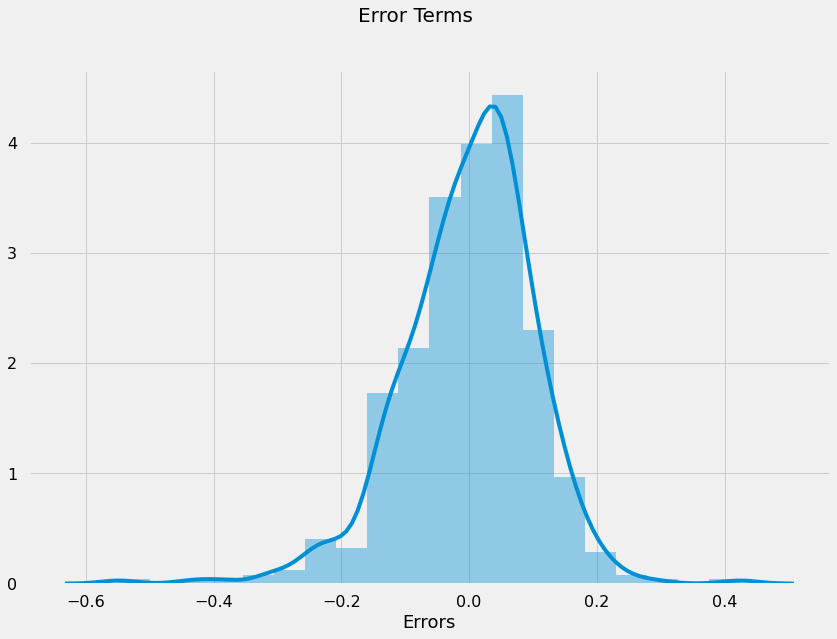

In [132]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 

plt.xlabel('Errors', fontsize = 18)  # X-label

plt.show()

It can be inferred from the above plot that, The mean of the residuals is it zero (or very close),so then this assumption is held true for this model.

# Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

### Applying the scaling on the test sets

In [133]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

DF_test[num_vars] = scaler.fit_transform(DF_test[num_vars])

In [134]:
DF_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.546312,0.530942,0.508750,0.418870,0.516216,0.027397,0.319635,...,0.086758,0.073059,0.082192,0.086758,0.173516,0.141553,0.132420,0.123288,0.155251,0.118721
std,0.500722,0.188034,0.481313,0.249189,0.228159,0.201253,0.188111,0.238702,0.163612,0.467403,...,0.282125,0.260830,0.275286,0.282125,0.379560,0.349389,0.339723,0.329520,0.362974,0.324202
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,0.359882,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.547913,0.494200,0.402533,0.520241,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.720622,0.651165,0.524362,0.682487,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing in X_test & y_test 

In [135]:
y_test = DF_test.pop('cnt')
X_test = DF_test

In [136]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [137]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(["atemp", "Aug", "Mar",'Sun','holiday','Tue','Oct','Jun','Sat','Thu','May','Feb','Wed',
                            'hum','temp','Jul','winter','Mon','workingday'], axis = 1)

In [138]:
# Making predictions using the Final Model
y_pred_m4 = LinearRegression_model_20.predict(X_test_m4)

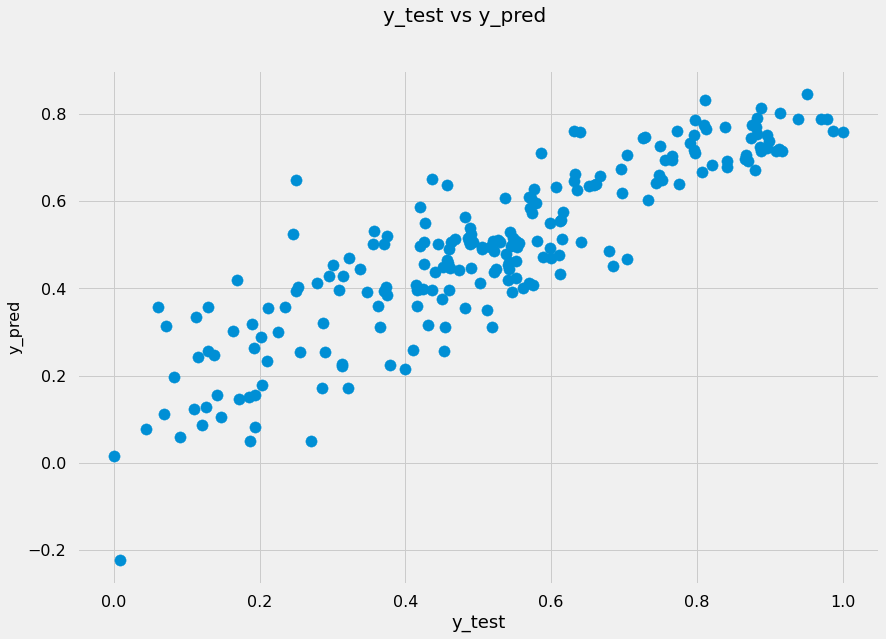

In [139]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16);

In [140]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m4)

0.7597672937514175

We have r2_score as 0.759 i.e. 75.9% 

In [141]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.7597672)*(11-1)/(11-1-1)
print(Adj_r2)

0.7330746666666667


We have adjusted r2_score as 0.733 i.e. 73.3% 

In [142]:
#Final Model Parameters are,
LinearRegression_model_20.params

const                                                                                      0.583793
yr                                                                                         0.245922
windspeed                                                                                 -0.192037
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds   -0.313004
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                              -0.087042
spring                                                                                    -0.239779
summer                                                                                    -0.039523
Dec                                                                                       -0.117805
Jan                                                                                       -0.122386
Nov                                                                                       -0.118112


We can see that the equation of our best fitted line is:

$ cnt =0.584 + 0.245  \times  yr - 0.192 \times windspeed - 0.313 \times Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds - 0.087 \times Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist - 0.239 \times spring - 0.039 \times summer - 0.117 \times Dec - 0.122 \times Jan - 0.118 \times Nov + 0.056 \times Sep